### Setup

In [18]:
import numpy as np
import scipy.stats as st

In [19]:
import pickle
with open('orig_to_bigr_distancesfirst200.pkl', 'rb') as f:
    data_bigr = pickle.load(f)
with open('orig_to_bigr_distancessecond200.pkl', 'rb') as f:
    data_bigr2 = pickle.load(f)

with open('orig_to_orig_distances_first200.pkl', 'rb') as f:
    data_orig = pickle.load(f)
with open('orig_to_orig_distances_second200.pkl', 'rb') as f:
    data_orig2 = pickle.load(f)
    
with open('orig_to_rand_distancesfirst200.pkl', 'rb') as f:
    data_rand = pickle.load(f)
with open('orig_to_rand_distancessecond200.pkl', 'rb') as f:
    data_rand2 = pickle.load(f)
    
    
with open('bigr_to_bigr_all.pkl', 'rb') as f:
    data_bigr_bigr = pickle.load(f)

In [20]:
def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

In [21]:
bigr = Merge(data_bigr, data_bigr2)
orig = Merge(data_orig, data_orig2)
rand = Merge(data_rand, data_rand2)

In [22]:
with open('orig_to_orig_all.pkl', 'wb') as f:
    pickle.dump(orig, f)
with open('orig_to_rand_all.pkl', 'wb') as f:
    pickle.dump(rand, f)
with open('orig_to_bigr_all.pkl', 'wb') as f:
    pickle.dump(bigr, f)

In [23]:
dist_bigr = list()
dist_bigr_bigr = list()
dist_orig = list()
dist_rand = list()
for key in data_bigr:
    dist_bigr.append(list(data_bigr[key].values()))
for key in data_bigr2:
    dist_bigr.append(list(data_bigr2[key].values()))
    

for key in data_orig:
    dist_orig.append(list(data_orig[key].values()))
for key in data_orig2:
    dist_orig.append(list(data_orig2[key].values()))
    
for key in data_rand:
    dist_rand.append(list(data_rand[key].values()))
for key in data_rand2:
    dist_rand.append(list(data_rand2[key].values()))
    
for key in data_bigr_bigr:
    dist_bigr_bigr.append(list(data_bigr_bigr[key].values()))

In [24]:
def flatten(l):
    return [float(item) for sublist in l for item in sublist]

In [25]:
def flatten2(l):
    return [float(item) for item in l]

In [26]:
dist_bigr = flatten(dist_bigr)
dist_bigr_bigr = flatten(dist_bigr_bigr)
dist_orig = flatten(dist_orig)
dist_rand = flatten(dist_rand)

In [27]:
dist_bigr = [x for x in dist_bigr if str(x) != 'nan']
dist_orig = [x for x in dist_orig if str(x) != 'nan']
dist_rand = [x for x in dist_rand if str(x) != 'nan']
dist_bigr_bigr = [x for x in dist_bigr_bigr if str(x) != 'nan']

In [28]:
def values_to_list(val, key):
    l = list(val[key].values())
    l = flatten2(l)
    l = [x for x in l if str(x) != 'nan']
    return l

In [29]:
def ttest(filename):
    d_orig = values_to_list(data_orig, filename)
    d_bigr = values_to_list(data_bigr, filename)
    d_rand = values_to_list(data_rand, filename)
    
    t1 = st.ttest_ind(d_orig, d_rand, alternative = "less")
    t2 = st.ttest_ind(d_orig, d_bigr, alternative = "less")
    t3 = st.ttest_ind(d_bigr, d_rand, alternative = "less")
    
    return [t1[1], t2[1], t3[1]]

In [30]:
pvalue1 = 0
pvalue2 = 0
pvalue3 = 0
for key in data_orig:
    t = ttest(key)
    if t[0] < 0.05:
        pvalue1 += 1
    if t[1] < 0.05:
        pvalue2 += 1
    if t[2] < 0.05:
        pvalue3 += 1
    

In [31]:
np.array([pvalue1, pvalue2, pvalue3])/len(data_orig)

array([1.        , 0.67336683, 1.        ])

/tmp/ipykernel_8935/919853876.py:10: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  confidence_interval = st.t.interval(alpha = 0.95, df=len(values)-1, loc=mean, scale=stdev)


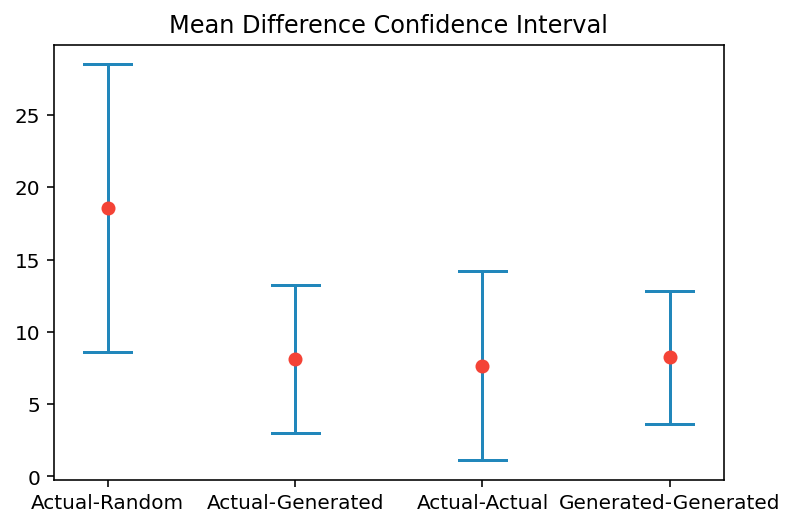

In [32]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt
import scipy.stats as st
import numpy as np

def plot_confidence_interval(x, values, color='#2187bb', horizontal_line_width=0.25):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = st.t.interval(alpha = 0.95, df=len(values)-1, loc=mean, scale=stdev)

    left = x - horizontal_line_width / 2
    top = max(confidence_interval)
    right = x + horizontal_line_width / 2
    bottom = min(confidence_interval)
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval


plt.xticks([1, 2, 3, 4], ['Actual-Random', 'Actual-Generated', 'Actual-Actual', 'Generated-Generated'])
plt.title('Mean Difference Confidence Interval')
plot_confidence_interval(1, dist_rand)
plot_confidence_interval(2, dist_bigr)
plot_confidence_interval(3, dist_orig)
plot_confidence_interval(4, dist_bigr_bigr)
plt.show()
#import tikzplotlib
#tikzplotlib.save("mytikz3.tex")

-------------